# Cleaning Data in Python

**Descripción del curso**

Se dice comúnmente que los científicos de datos pasan el 80% de su tiempo limpiando y manipulando datos y solo el 20% de su tiempo analizándolos. El tiempo dedicado a la limpieza es vital, ya que el análisis de datos sucios puede llevarlo a sacar conclusiones inexactas. La limpieza de datos es una tarea esencial en la ciencia de datos. Sin datos debidamente limpiados, los resultados de cualquier análisis de datos o modelo de aprendizaje automático podrían ser inexactos. 

En este curso, aprenderá a identificar, diagnosticar y tratar una variedad de problemas de limpieza de datos en Python, desde simples hasta avanzados. Tratará con tipos de datos incorrectos, comprobará que sus datos estén en el rango correcto, manejará los datos que faltan, realizará la vinculación de registros y mucho más. 

## Importando la data

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [46]:
df_ride = pd.read_csv('../datasets/ride_sharing_new.csv')
df_ridev2 = pd.read_csv('../datasets/ride_sharing_new_v2.csv',sep=';')
height_weight= pd.read_csv('../datasets/height_weight.csv',sep=';',index_col=0)
airlines = pd.read_csv('../datasets/airlines_final.csv',index_col=0)
categories = pd.read_csv('../datasets/categories.csv',index_col=0,sep=';')
banking = pd.read_csv('../datasets/banking.csv',index_col=0,sep=';')
restaurants = pd.read_csv('../datasets/restaurants_L2_dirty.csv',index_col=0)
restaurants_new = pd.read_csv('../datasets/restaurants_L2.csv',index_col=0)
restaurants_new.head()

,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [52]:
categories.shape

(5, 3)

## 1. Common data problems

### Data type constraints

In [12]:
df_ride.dtypes

Unnamed: 0            int64
duration             object
station_A_id          int64
station_A_name       object
station_B_id          int64
station_B_name       object
bike_id               int64
user_type             int64
user_birth_year       int64
user_gender          object
user_type_cat      category
duration_trim        object
duration_time         int32
dtype: object

In [14]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  object  
 12  duration_time    25760 non-null  int32   
dtypes: category(1), int32(1), int64(6), object(5)
memory usage: 2.3+ MB


In [7]:
df_ride['user_type'].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

In [9]:
# CONVIRTIENDO EN CATEGORICO EL VALOR DE LA COLUMNA
df_ride['user_type_cat'] = df_ride['user_type'].astype('category')

# Comprobar si el tipo de la columna es categórico
assert df_ride['user_type_cat'].dtype == 'category'
print(df_ride['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


In [11]:
# CONVIRTIENDO EN NUMERICO Y CORTANDO UNA PARTE DE LA COLUMNA
df_ride['duration_trim'] = df_ride['duration'].str.strip('minutes')
df_ride['duration_time'] = df_ride['duration_trim'].astype('int')
assert df_ride['duration_time'].dtype == 'int'
# print(df_ride[['duration','duration_trim','duration_time']])
print(df_ride['duration_time'].mean())

11.389052795031056


### Data range constraints

In [29]:
# Maximo valor de 'tire_sizes' sera 27
df_ridev2['tire_sizes'] = df_ridev2['tire_sizes'].astype('int')
df_ridev2.loc[df_ridev2['tire_sizes']> 27, 'tire_sizes'] = 27
df_ridev2['tire_sizes'] =df_ridev2['tire_sizes'].astype('category')

print(df_ridev2['tire_sizes'].describe())

count     20
unique     2
top       27
freq      10
Name: tire_sizes, dtype: int64


In [41]:
import datetime as dt
df_ridev2['ride_dt'] = pd.to_datetime(df_ridev2['ride_date'])

# Save today's date
today = dt.date.today()
# print(today)
df_ridev2.loc[df_ridev2['ride_dt'] > pd.to_datetime(today), 'ride_dt'] = today
print(df_ridev2['ride_dt'].max())

2021-05-17


### Uniqueness constraints

In [88]:
height_weight.head()

,first_name,last_name,height,weight
0,Lane,Reese,181,64
1,Ivor,Pierce,168,66
2,Roary,Gibson,191,99
3,Shannon,Little,185,65
4,Abdul,Fry,169,65


**The .duplicated() method**

> **subset** : List of column names to check for duplication.
>
> **keep** : Whether to keep 'first', 'last' o all ('False')
>
> **Inplace** : Drop duplicated rows directly inside DataFrame without creating new object ( True ).

In [89]:
column_names = ['first_name','last_name']
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')

,first_name,last_name,height,weight
22,Cole,Palmer,178,91
102,Cole,Palmer,178,91
28,Desirae,Shannon,195,83
103,Desirae,Shannon,196,83
1,Ivor,Pierce,168,66
101,Ivor,Pierce,168,88
37,Mary,Colon,179,75
100,Mary,Colon,179,75


In [90]:
height_weight.drop_duplicates(inplace = True) # Elimino duplicado completo

In [91]:
column_names = ['first_name','last_name']
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')

,first_name,last_name,height,weight
28,Desirae,Shannon,195,83
103,Desirae,Shannon,196,83
1,Ivor,Pierce,168,66
101,Ivor,Pierce,168,88


In [93]:
column_names = ['first_name','last_name']
summaries = {'height': 'max','weight': 'mean'}

In [100]:
# Eliminar los duplicados que diferen en alguna columna
height_weight = height_weight.groupby(by = column_names).agg(summaries).reset_index()
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')

,first_name,last_name,height,weight


## 2.Text and categorical data problems

### Membership constraints

In [10]:
airlines.head(2)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied


In [11]:
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 



In [18]:
# set(airlines['cleanliness']) => sacar los valores uniques de la columna

cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)
print(airlines[cat_clean_rows])
# print(airlines[~cat_clean_rows]) # Data que nos interesa

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


### Categorical variables

In [22]:
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'eur' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [23]:
print(airlines['dest_region'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [24]:
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [ ]:
# Remapping categories

In [27]:
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

airlines['wait_type'] = pd.cut(airlines['wait_min'], bins=label_ranges, labels = label_names)

mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [28]:
airlines['day_week'].unique()

array(['weekday', 'weekend'], dtype=object)

In [30]:
airlines

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,1475,Tuesday,ALASKA,NEW YORK-JFK,east us,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified,long,weekday
2805,2222,Thursday,SOUTHWEST,PHOENIX,west us,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied,medium,weekday
2806,2684,Friday,UNITED,ORLANDO,east us,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied,medium,weekday
2807,2549,Tuesday,JETBLUE,LONG BEACH,west us,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied,medium,weekday


### Cleaning text data

In [ ]:
# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [ ]:
resp_length = airlines['survey_response'].str.len()

airlines_survey = airlines[resp_length > 40]
assert airlines_survey['survey_response'].str.len().min() > 40

print(airlines_survey['survey_response'])

## 3. Advanced data problems

### Uniformity

In [57]:
acct_eu = banking['acct_cur'] == 'euro'
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
banking.loc[acct_eu, 'acct_cur'] = 'dollar'
assert banking['acct_cur'].unique() == 'dollar'

In [61]:
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Inferir formato de fecha y hora
                                           infer_datetime_format = True,
                                           # Devuelve el valor faltante por error 
                                           errors = 'coerce') 
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
banking['acct_year'].head()

0   2018-03-05
1          NaT
2          NaT
3          NaT
4   2017-05-06
Name: account_opened, dtype: datetime64[ns]


0    2018
1     NaN
2     NaN
3     NaN
4    2017
Name: acct_year, dtype: object

### Cross field validation

In [63]:
banking.head()

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction,acct_year
0,8C35540A,44244.7100,dollar,35500.50,2018-03-05,30/09/2019,2018
1,D5536652,86506.8500,dollar,81921.86,NaT,14/01/2019,NaN
2,A631984D,77799.3300,dollar,46412.27,NaT,6/10/2019,NaN
3,93F2F951,113589.0404,dollar,76563.35,NaT,10/07/2019,NaN
4,DE0A0882,120998.0035,dollar,18669.01,2017-05-06,15/01/2019,2017


In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']
# sum(axis=1) para sumar filas

consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

In [ ]:
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

### Completeness

**MISSING**

**Completamente al azar || fallar al azar || fallar no al azar**

- **Falta completamente al azar:** no existe una relación sistemática entre los valores perdidos de una columna y otros valores o valores propios.
- **Missing at Random:** Existe una relación sistemática entre los valores perdidos de una columna y otros valores observados.
- **Missing not at Random:** Existe una relación sistemática entre los valores perdidos de una columna y los valores no observados.

In [ ]:
# El paquete missingno permite 
# crear visualizaciones utiles para nuestros datos faltantes

In [ ]:
# Matriz que muestra como se distribuyen los valores perdidos en una columna

cust_id             0
acct_amount         0
acct_cur            0
inv_amount          0
account_opened      8
last_transaction    0
acct_year           8
dtype: int64


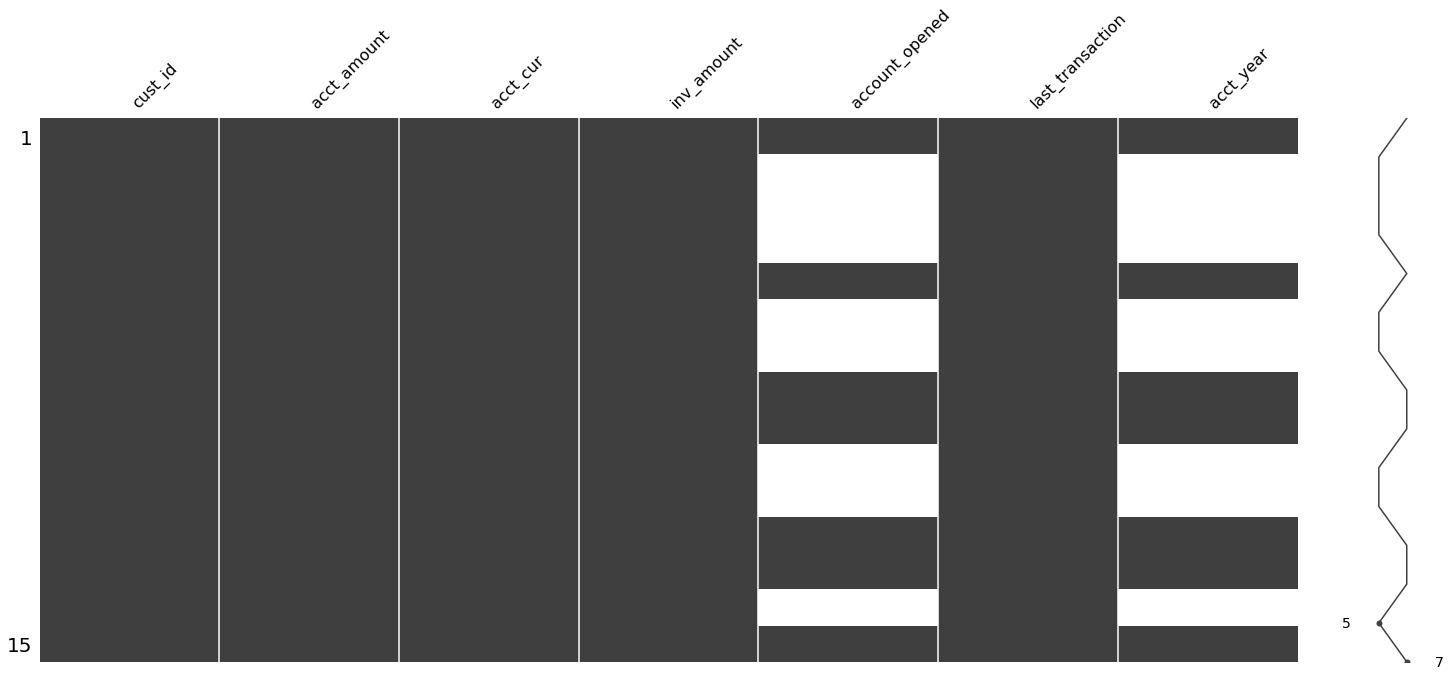

In [68]:
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [69]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

In [71]:
banking.head(3)

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction,acct_year
0,8C35540A,44244.71,dollar,35500.50,2018-03-05,30/09/2019,2018
1,D5536652,86506.85,dollar,81921.86,NaT,14/01/2019,NaN
2,A631984D,77799.33,dollar,46412.27,NaT,6/10/2019,NaN


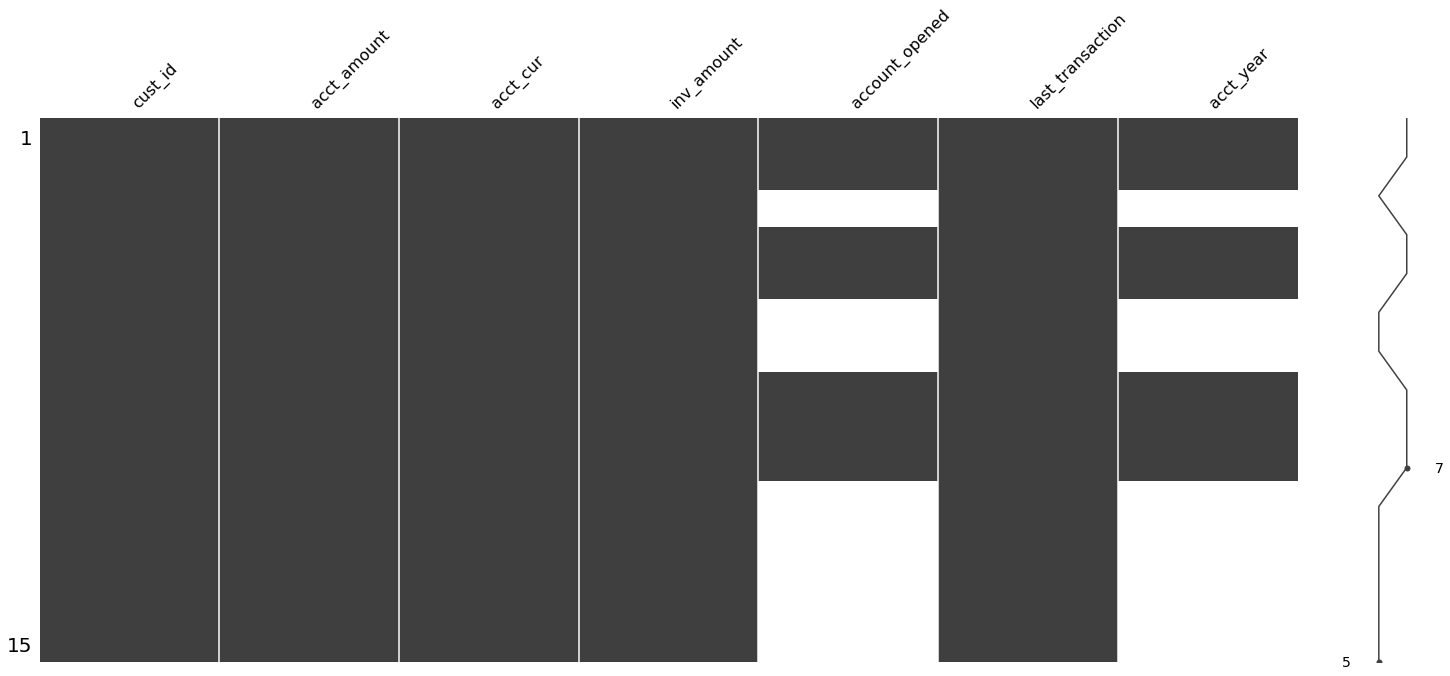

In [72]:
banking_sorted = banking.sort_values(by ='inv_amount')
msno.matrix(banking_sorted)
plt.show()

In [73]:
banking_fullid = banking.dropna(subset = ['cust_id'])
acct_imp = banking_fullid['inv_amount']* 5 
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})
print(banking_imputed.isna().sum())

cust_id             0
acct_amount         0
acct_cur            0
inv_amount          0
account_opened      8
last_transaction    0
acct_year           8
dtype: int64


## 4. Record linkage

### Comparing strings

In [22]:
# conda install -c conda-forge fuzzywuzzy

In [11]:
from fuzzywuzzy import fuzz

In [13]:
fuzz.WRatio('Reeding','Reading')
# 0 -100 => 0 nada parecido | 1 muy parecido igual

86

In [14]:
fuzz.WRatio('Houston Rockets','Rockets')

90

In [15]:
from fuzzywuzzy import process

In [19]:
# Define string and array of possible matches
string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(['Rockets vs Lakers','Lakers vs Rockets','Houson vs Los Angeles','Heat vs Bulls'])
process.extract(string, choices, limit = 4)
#(coincidencia más cercana, puntuación de similitud, índice de coincidencia)

[('Rockets vs Lakers', 86, 0),
 ('Lakers vs Rockets', 86, 1),
 ('Houson vs Los Angeles', 86, 2),
 ('Heat vs Bulls', 86, 3)]

In [24]:
restaurants.head()

,name,addr,city,phone,type
0,kokomo,6333 w. third st.,la,2139330773,american
1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [26]:
unique_types = restaurants['type'].unique()
# print(process.extract('asian', unique_types, limit = len(unique_types)))
# print(process.extract('american', unique_types, limit = len(unique_types)))
# print(process.extract('italian', unique_types, limit = len(unique_types)))

[('italian', 100), ('asian', 67), ('californian', 56), ('continental', 51), ('indonesian', 47), ('russian', 43), ('mexican', 43), ('american', 40), ('japanese', 40), ('mexican/tex-mex', 39), ('american ( new )', 39), ('pacific new wave', 39), ('vietnamese', 35), ('delis', 33), ('pizza', 33), ('diners', 31), ('middle eastern', 30), ('chicken', 29), ('chinese', 29), ('health food', 27), ('southern/soul', 27), ('cajun/creole', 26), ('steakhouses', 26), ('seafood', 14), ('hot dogs', 13), ('noodle shops', 13), ('eclectic', 13), ('french ( new )', 13), ('desserts', 13), ('hamburgers', 12), ('fast food', 12), ('coffeebar', 12), ('coffee shops', 0)]


In [27]:
matches = process.extract('italian', restaurants['type'], limit = len(restaurants['type']))

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 14), ('italian', 100, 21), ('italian', 100, 47), ('italian', 100, 57), ('italian', 100, 73)]


In [35]:
matches = process.extract('italian', restaurants['type'], limit=len(restaurants.type))

for match in matches:
    if match[1] >= 80:
        restaurants.loc[restaurants['type'] == match[0],'type' ] = 'italian'

In [36]:
categoriesRestaurant = ['italian', 'asian', 'american']
categoriesRestaurant

['italian', 'asian', 'american']

In [38]:
for cuisine in categoriesRestaurant:  
    matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))
    for match in matches:
        if match[1] >= 80:
            restaurants.loc[restaurants['type'] == match[0]] = cuisine
print(restaurants['type'].unique())

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'middle eastern' 'asian'
 'vietnamese' 'health food' 'pacific new wave' 'indonesian' 'eclectic'
 'chicken' 'fast food' 'southern/soul' 'coffeebar' 'continental'
 'french ( new )' 'desserts' 'chinese' 'pizza']


### Generating pairs

In [44]:
# conda install -c conda-forge recordlinkage

In [41]:
import recordlinkage

In [65]:
indexer = recordlinkage.Index() # Creando un objeto de indexación

In [66]:
indexer.block('phone') # Bloquear la indexacion a la columna "x"
pairs = indexer.index(restaurants, restaurants_new)
# Generar pares con los 2 dataframes

In [67]:
# Compare entre columnas, califique la comparación 
# y luego vincule los DataFrames.

In [68]:
# instancia de un objeto de comparación
comp_cl = recordlinkage.Compare()

In [69]:
# encontrar coincidencias exactas
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# encontrar cadenas similares con un umbral de similitud de 0.8
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

<Compare>

In [71]:
# Calcule la comparación de los pares
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

### Linking DataFrames

In [ ]:
# Vincular los dataframes censales
# Valor 1 coincidencia | 0 caso contrario

In [ ]:
# Aísle las instancias de posibles coincidencias en las que la suma de filas 
# sea superior o igual a 3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

In [ ]:
matching_indices = matches.index.get_level_values(1)

#  nuevosvalores basados en no duplicados 
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)